# TensorFlow MNIST Tutorial

In [3]:
import tensorflow as tf
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

Lets load MNIST data and check random image

Extracting ../../datasets/MNIST/train-images-idx3-ubyte.gz
Extracting ../../datasets/MNIST/train-labels-idx1-ubyte.gz
Extracting ../../datasets/MNIST/t10k-images-idx3-ubyte.gz
Extracting ../../datasets/MNIST/t10k-labels-idx1-ubyte.gz
Label 0


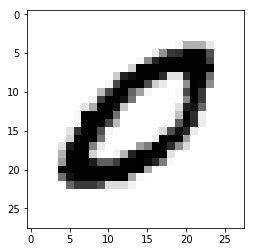

In [6]:
mnist = input_data.read_data_sets('../../datasets/MNIST', one_hot=True)
batch = mnist.train.next_batch(1)
sample_image = batch[0].reshape([28, 28])
print('Label %s' % np.argmax(batch[1]))
plt.imshow(sample_image, cmap='Greys')

## Helper functions

Helper functions for building CNN

In [17]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

## Build regression model

Lets start we simple regression model

In [19]:
# Place holders for data
x_input = tf.placeholder(tf.float32, shape=[None, 784])
y_input = tf.placeholder(tf.float32, shape=[None, 10])

# First convolution layer
x_image = tf.reshape(x_input, [-1, 28, 28, 1])
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

# Second convolution layer
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

# First dense layer
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

# Dropout
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# Output layer
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

## Train

In [21]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_input, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_input, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(20000):
        batch = mnist.train.next_batch(50)
        if i % 1000 == 0:
            train_accuracy = accuracy.eval(
                feed_dict={x_input: batch[0], y_input: batch[1], keep_prob: 1.0})
            print('step %d, training accuracy %g' % (i, train_accuracy))
        train_step.run(feed_dict={x_input: batch[0], y_input: batch[1], keep_prob: 0.5})
    print('test accuracy %g' % accuracy.eval(feed_dict={
        x_input: mnist.test.images, y_input: mnist.test.labels, keep_prob: 1.0}))

step 0, training accuracy 0
step 1000, training accuracy 0.92
step 2000, training accuracy 0.94
step 3000, training accuracy 0.96
step 4000, training accuracy 1
step 5000, training accuracy 0.98
step 6000, training accuracy 1
step 7000, training accuracy 1
step 8000, training accuracy 1
step 9000, training accuracy 0.98
step 10000, training accuracy 1
step 11000, training accuracy 1
step 12000, training accuracy 1
step 13000, training accuracy 0.98
step 14000, training accuracy 1
step 15000, training accuracy 1
step 16000, training accuracy 1
step 17000, training accuracy 1
step 18000, training accuracy 0.98
step 19000, training accuracy 1
test accuracy 0.9919
